In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [36]:
df1 = pd.read_csv("models_v3.csv", na_values=['–','—', '-'])
df1.head()

,URL,Name,Bio,Subscribers,Videos_views,Pornhub_rank,Model_rank,Public_videos,Paid_videos,Fan_club_material,...,Pornstar Profile Views,Profile Views,Relationship status,Star Sign,Tattoos,Turn Offs,Turn Ons,Video Views,Videos Watched,Hometown
0,http://pornhub.com/model/mini-diva,Mini Diva,Hey there! You can call me Mini Diva. I love s...,820K,"364,041,175",11,1.0,65.0,7.0,107.0,...,NaN,"59,460,751",Single,NaN,No,Dunno what can turn me off.,"When you watching me, fucking love it!","364,041,175","1,057",Prague
1,http://pornhub.com/model/yinyleon,yinyleon,We will try to bring you the best fuck that we...,586K,"510,938,330",21,2.0,140.0,1.0,NaN,...,NaN,"67,129,229",Taken,NaN,NaN,NaN,My biggest turn on is when I get my ass and pu...,"510,938,330","1,422",NaN
2,http://pornhub.com/model/crystal-lust,Crystal Lust,Cum see more of me on Onlyfans.com/LustCrystal...,433K,"346,726,146",29,4.0,104.0,69.0,173.0,...,NaN,"50,243,658",Taken,NaN,NaN,NaN,Getting fucked in the ass Onlyfans.com/LustCry...,"346,726,146",560,NaN
3,http://pornhub.com/model/solazola,Solazola,"Hi, guys) We hope that you LOVE SEX as much as...",748K,"234,093,027",32,5.0,50.0,14.0,181.0,...,NaN,"56,041,576",Taken,NaN,Yes,NaN,blowjobs (love this action),"234,093,027","1,059",NaN
4,http://pornhub.com/model/dickforlily,DickForLily,just a couple who loves to fuck and gets off o...,596K,"357,380,610",43,7.0,175.0,23.0,17.0,...,NaN,"44,344,938",Taken,NaN,No,avaricious and hypocritical people,"Men in suits , expensive cars , cute guys","357,380,610","3,391",NaN


In [37]:
df1.shape

(81774, 47)

In [38]:
df1.columns

Index(['URL', 'Name', 'Bio', 'Subscribers', 'Videos_views', 'Pornhub_rank',
       'Model_rank', 'Public_videos', 'Paid_videos', 'Fan_club_material',
       'Verified_pornstar', 'Verified_member', 'Premium_user',
       'Pornhub_awards_winner', 'Age', 'Background', 'Birthday', 'Birthplace',
       'Born', 'Career Start and End', 'Career Status', 'City and Country',
       'Endowment', 'Ethnicity', 'Eye Color', 'Facial Hair', 'Fake Boobs',
       'Foreskin', 'Gender', 'Hair Color', 'Height', 'Weight', 'Interested in',
       'Interests and hobbies', 'Joined', 'Measurements', 'Piercings',
       'Pornstar Profile Views', 'Profile Views', 'Relationship status',
       'Star Sign', 'Tattoos', 'Turn Offs', 'Turn Ons', 'Video Views',
       'Videos Watched', 'Hometown'],
      dtype='object')

In [39]:
df2 = df1.drop(['Bio', 'Paid_videos', 'Fan_club_material', 'Age', 'Background','Birthplace', 'Born', 'Career Start and End','Career Status', 'City and Country', 'Endowment','Eye Color','Facial Hair', 'Fake Boobs', 'Foreskin', 'Height', 'Weight',
       'Interests and hobbies', 'Pornstar Profile Views', 'Measurements', 'Star Sign', 'Turn Offs', 'Turn Ons', 'Hometown', 'Hair Color', 'Piercings', 'Tattoos', 'Interested in', 'Videos Watched', 'Videos_views'],axis='columns')
df2.shape

(81774, 17)

In [40]:
df2.isnull().sum()

URL                          0
Name                         0
Subscribers                  0
Pornhub_rank                 0
Model_rank                 164
Public_videos             2213
Verified_pornstar            0
Verified_member              0
Premium_user                 0
Pornhub_awards_winner        0
Birthday                  1565
Ethnicity                49348
Gender                       0
Joined                       0
Profile Views                0
Relationship status        606
Video Views                223
dtype: int64

In [41]:
exclude = ['day', 'week']
df2 = df2[~df2.Joined.str.contains('|'.join(exclude))]

In [42]:
df2.shape

(79774, 17)

In [43]:
df3 = df2.dropna()
df3.isnull().sum()

URL                      0
Name                     0
Subscribers              0
Pornhub_rank             0
Model_rank               0
Public_videos            0
Verified_pornstar        0
Verified_member          0
Premium_user             0
Pornhub_awards_winner    0
Birthday                 0
Ethnicity                0
Gender                   0
Joined                   0
Profile Views            0
Relationship status      0
Video Views              0
dtype: int64

In [44]:
df3.head()

,URL,Name,Subscribers,Pornhub_rank,Model_rank,Public_videos,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Birthday,Ethnicity,Gender,Joined,Profile Views,Relationship status,Video Views
0,http://pornhub.com/model/mini-diva,Mini Diva,820K,11,1.0,65.0,0,1,1,0,"Aug 6, 1994",White,Female,2 years ago,"59,460,751",Single,"364,041,175"
3,http://pornhub.com/model/solazola,Solazola,748K,32,5.0,50.0,0,1,0,0,"Dec 12, 1999",White,Couple,2 years ago,"56,041,576",Taken,"234,093,027"
4,http://pornhub.com/model/dickforlily,DickForLily,596K,43,7.0,175.0,0,1,0,0,"Oct 5, 1998",White,Couple,2 years ago,"44,344,938",Taken,"357,380,610"
5,http://pornhub.com/model/reislin,Reislin,1M,42,6.0,44.0,0,1,1,0,"Dec 22, 1999",White,Female,2 years ago,"54,400,775",Taken,"583,379,162"
6,http://pornhub.com/model/shaiden-rogue,Shaiden Rogue,479K,46,8.0,36.0,0,1,1,0,"Mar 30, 2001",White,Female,1 year ago,"43,243,767",Single,"166,318,818"


In [45]:
mapping = dict(K='E3', M='E6', B='E9')
df3.Subscribers = pd.to_numeric(df3.Subscribers.replace(mapping, regex=True), downcast='integer')

df3.columns = [c.replace(' ', '_') for c in df3.columns]

C:\Users\savio\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [46]:
df3.Verified_pornstar = df3.Verified_pornstar.astype(bool)
df3.Premium_user = df3.Premium_user.astype(bool)
df3.Pornhub_awards_winner = df3.Pornhub_awards_winner.astype(bool)
df3.Verified_member = df3.Verified_member.astype(bool)
df3.Model_rank = df3.Model_rank.astype(int)
df3.Public_videos = df3.Public_videos.astype(int)
df3.Profile_Views = df3.Profile_Views.str.replace(',','').astype(float).astype(int)
df3.Video_Views = df3.Video_Views.str.replace(',','').astype(float).astype(int)
df3.head()

,URL,Name,Subscribers,Pornhub_rank,Model_rank,Public_videos,Verified_pornstar,Verified_member,Premium_user,Pornhub_awards_winner,Birthday,Ethnicity,Gender,Joined,Profile_Views,Relationship_status,Video_Views
0,http://pornhub.com/model/mini-diva,Mini Diva,820000,11,1,65,False,True,True,False,"Aug 6, 1994",White,Female,2 years ago,59460751,Single,364041175
3,http://pornhub.com/model/solazola,Solazola,748000,32,5,50,False,True,False,False,"Dec 12, 1999",White,Couple,2 years ago,56041576,Taken,234093027
4,http://pornhub.com/model/dickforlily,DickForLily,596000,43,7,175,False,True,False,False,"Oct 5, 1998",White,Couple,2 years ago,44344938,Taken,357380610
5,http://pornhub.com/model/reislin,Reislin,1000000,42,6,44,False,True,True,False,"Dec 22, 1999",White,Female,2 years ago,54400775,Taken,583379162
6,http://pornhub.com/model/shaiden-rogue,Shaiden Rogue,479000,46,8,36,False,True,True,False,"Mar 30, 2001",White,Female,1 year ago,43243767,Single,166318818


In [47]:
df3.describe()

,Subscribers,Pornhub_rank,Model_rank,Public_videos,Profile_Views,Video_Views
count,30631.000000,30631.000000,30631.000000,30631.000000,3.063100e+04,3.063100e+04
mean,3100.383043,49444.783063,35828.535666,18.491626,1.085758e+05,1.018306e+06
std,18198.470816,27890.147737,24831.675943,47.383826,1.033908e+06,9.189778e+06
min,0.000000,11.000000,1.000000,1.000000,1.200000e+01,2.000000e+00
25%,197.000000,25926.500000,14197.000000,4.000000,2.653000e+03,2.424500e+03
50%,496.000000,47967.000000,32224.000000,8.000000,7.023000e+03,1.307700e+04
75%,1500.000000,72531.000000,55291.500000,18.000000,2.508050e+04,9.702850e+04
max,1000000.000000,100240.000000,134458.000000,2910.000000,5.946075e+07,5.833792e+08


Text(0, 0.5, 'Video Count')

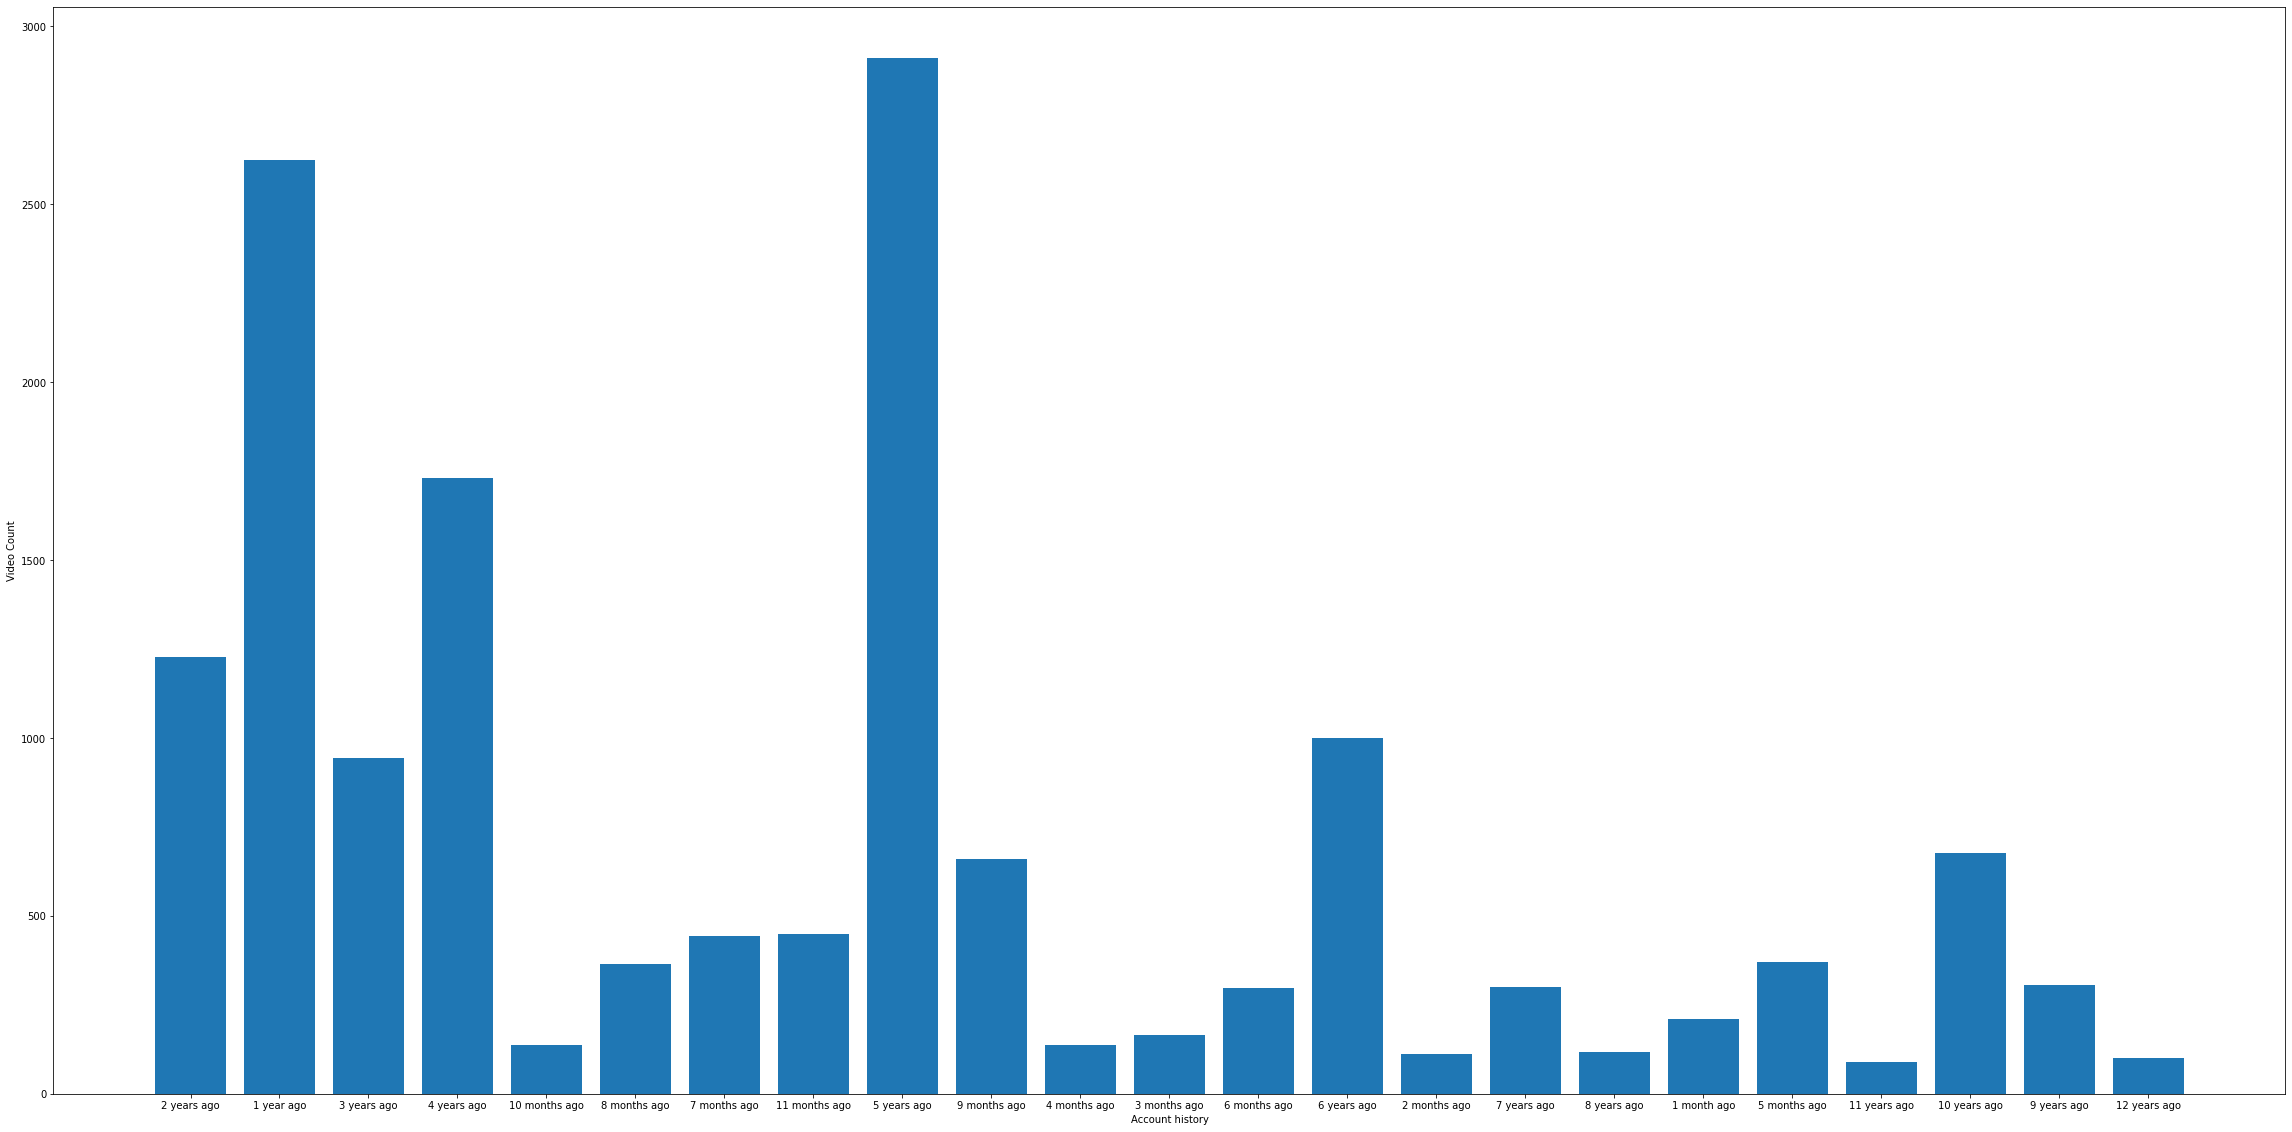

In [48]:
matplotlib.rcParams["figure.figsize"] = (40,20)
plt.bar(df3.Joined, df3.Public_videos)
plt.xlabel("Account history")
plt.ylabel("Video Count")

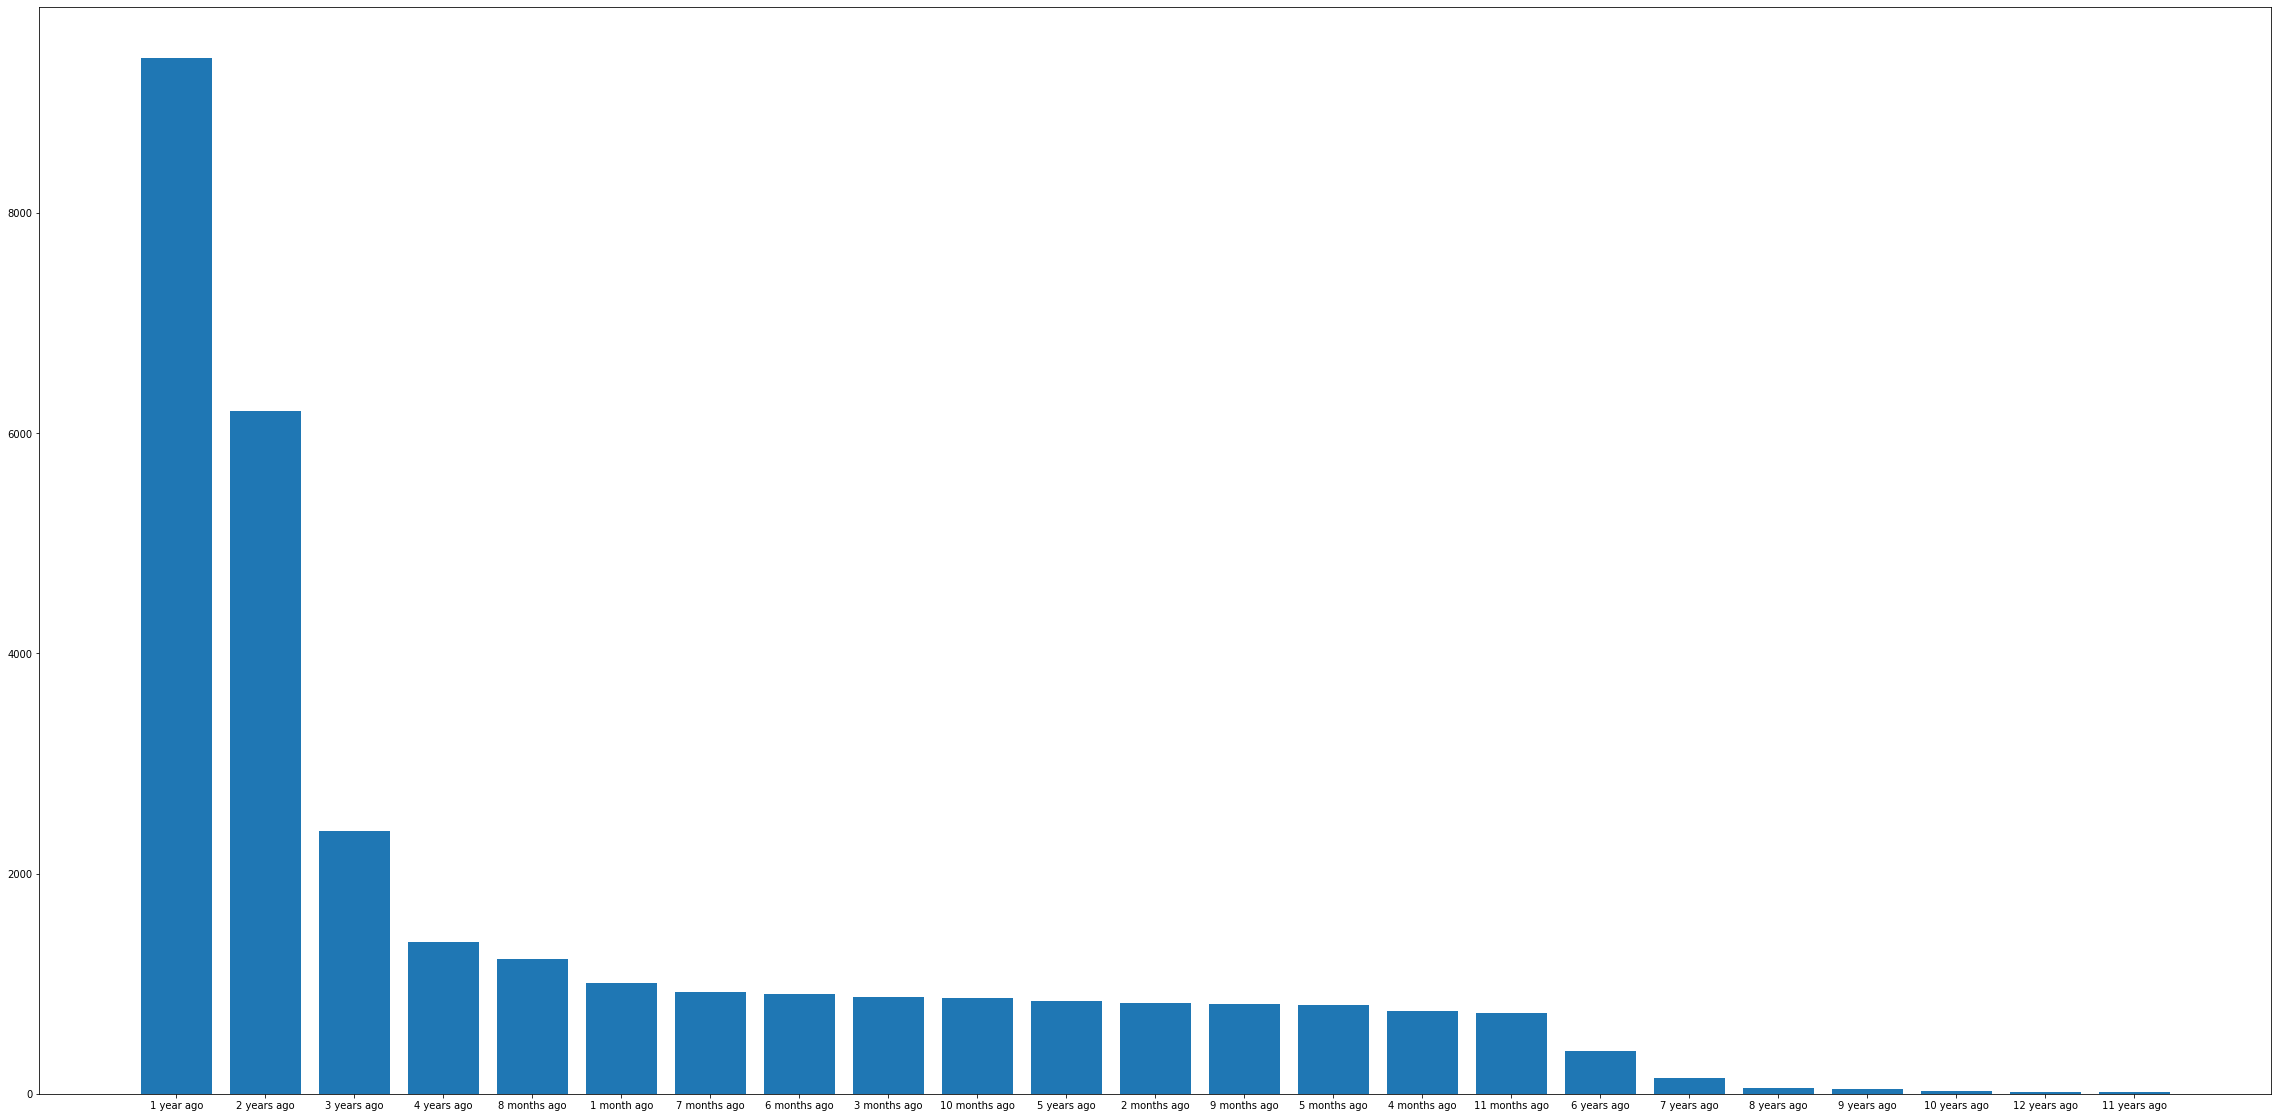

In [49]:
counts = df3["Joined"].value_counts()
plt.bar(counts.index, counts.values)
plt.show()
plt.xlabel("Account history")
plt.ylabel("Number of accounts made")

In [50]:
df3.Ethnicity.unique()

array(['White', 'Other', 'Asian', 'Latin', 'Indian', 'Black',
       'Middle Eastern'], dtype=object)

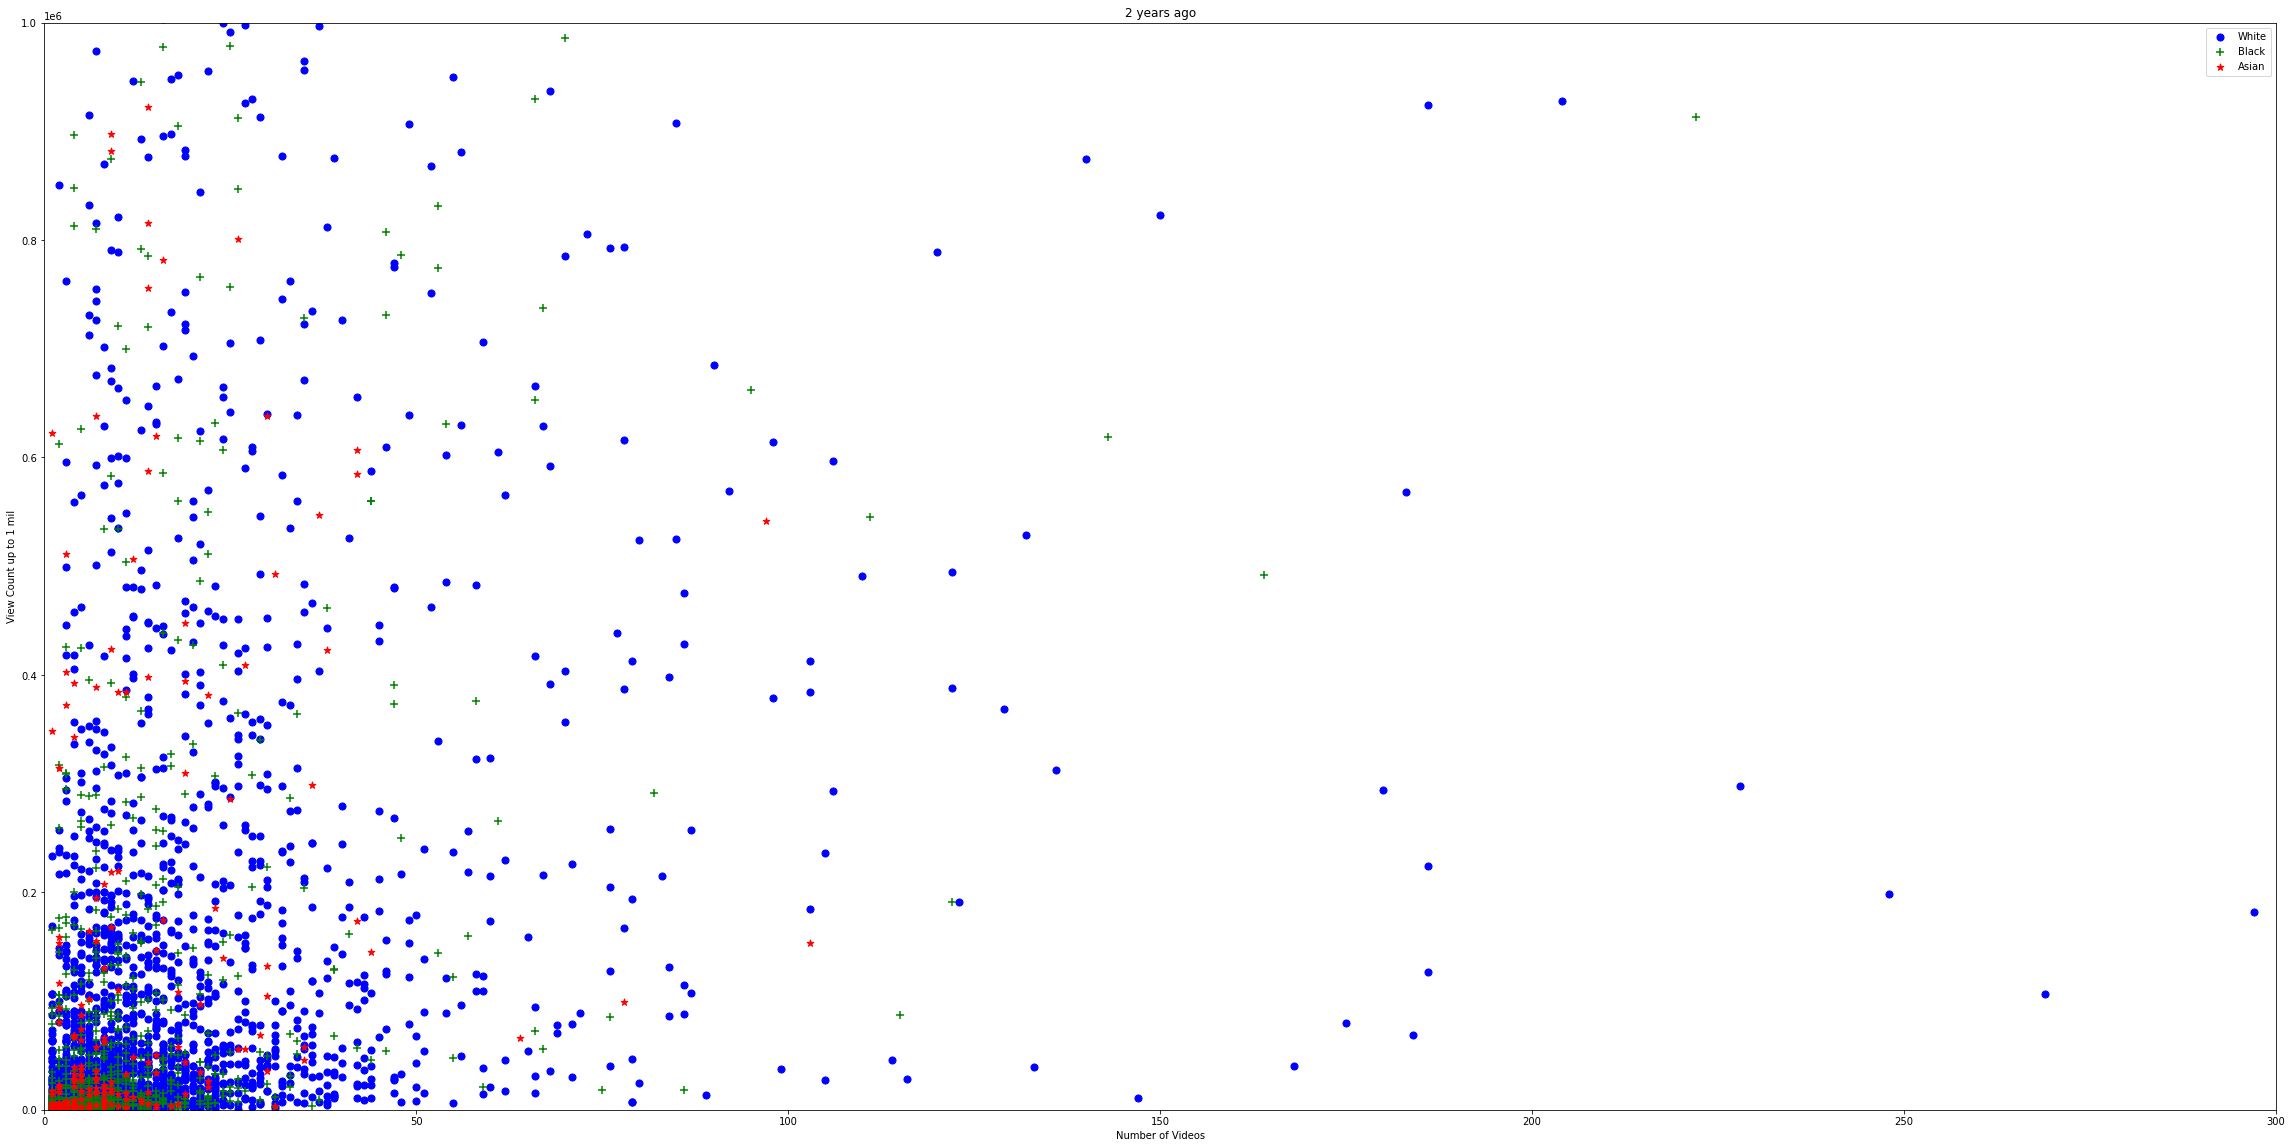

In [65]:
def plot_scatter_chart(df,age):
    w = df[(df.Joined==age) & (df.Ethnicity=='White')]
    b = df[(df.Joined==age) & (df.Ethnicity=='Black')]
    x = df[(df.Joined==age) & (df.Ethnicity=='Asian')]
    matplotlib.rcParams['figure.figsize'] = (40,20)
    plt.scatter(w.Public_videos, w.Video_Views, color='blue',label='White', s=50)
    plt.scatter(b.Public_videos, b.Video_Views, marker='+', color='green',label='Black', s=50)
    plt.scatter(x.Public_videos, x.Video_Views, marker='*', color='red',label='Asian', s=50)
    plt.xlabel("Number of Videos")
    plt.ylabel("View Count up to 1 mil")
    plt.title(age)
    plt.xlim(0,300)
    plt.ylim(0,1000000)
    plt.legend()
    
plot_scatter_chart(df3, "2 years ago")